In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [58]:
combined_df = pd.read_csv(filepath_or_buffer = '../data/EconomicIndicators.csv')
combined_df.tail(15)

,Date,Contraction,Unemployment,Yield Spread,GDP pct change
241,2013-07-01,0.0,7.2,2.59,0.783415
242,2013-10-01,0.0,6.9,2.63,0.798249
243,2014-01-01,0.0,6.7,2.64,-0.251764
244,2014-04-01,0.0,6.2,2.52,1.253873
245,2014-07-01,0.0,6.1,2.39,1.208911
246,2014-10-01,0.0,5.7,2.13,0.471851
247,2015-01-01,0.0,5.5,1.75,0.822715
248,2015-04-01,0.0,5.4,1.92,0.824614
249,2015-07-01,0.0,5.1,1.87,0.240116
250,2015-10-01,0.0,5.0,1.73,0.099909


In [3]:
target = combined_df["Contraction"]
target_names = ["expansion", "recession"]

In [4]:
data = combined_df.drop(["Contraction", 'Date'], axis=1)
feature_names = data.columns
data.head()

,Unemployment,Yield Spread,GDP pct change
0,2.6,0.57,0.772984
1,2.7,0.63,-0.562694
2,3.7,0.93,-1.513976
3,5.3,1.21,-0.478013
4,5.8,1.47,0.108991


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [6]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.922


In [8]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

   expansion       0.93      0.98      0.95        53
   recession       0.88      0.64      0.74        11

   micro avg       0.92      0.92      0.92        64
   macro avg       0.90      0.81      0.85        64
weighted avg       0.92      0.92      0.92        64



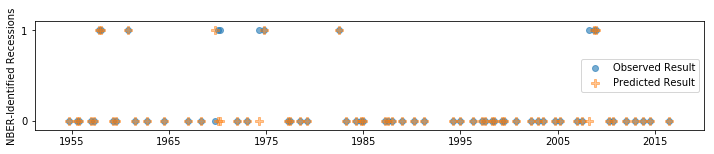

In [79]:
plt.figure(figsize=(12,2))
plt.scatter(y_test.index, y_test, alpha=.6, label="Observed Result")
plt.scatter(y_test.index, predictions, alpha = .45, label = "Predicted Result", marker="P", s=80)
plt.legend(loc=7)
plt.yticks(np.arange(0, 2))
plt.xticks(np.arange(7, 280, 40), np.arange(1955, 2018, 10))
plt.ylabel("NBER-Identified Recessions")
plt.savefig("../Images/PredictedRecessions.png")